# **concept of Speech signal analysis**

*  Name : Mai Nady Farag Awad

*  presented to : Prof Amr Rafeat

this report is part of course digital speech signal for master studies

# Outline of Topics in speech signal analysis








1.  introduction

2.   speech in frequency domain
3.   spectrogram
4. speech production model show how the model is compiled from cascaded filters  to produce voiced speech
5. illustrate popular features pitch , Reflection coefficients, Energy and Zero  crossing
6. illustrate cepestrum domain
7. mel scale


# 1- introduction




The speech signal
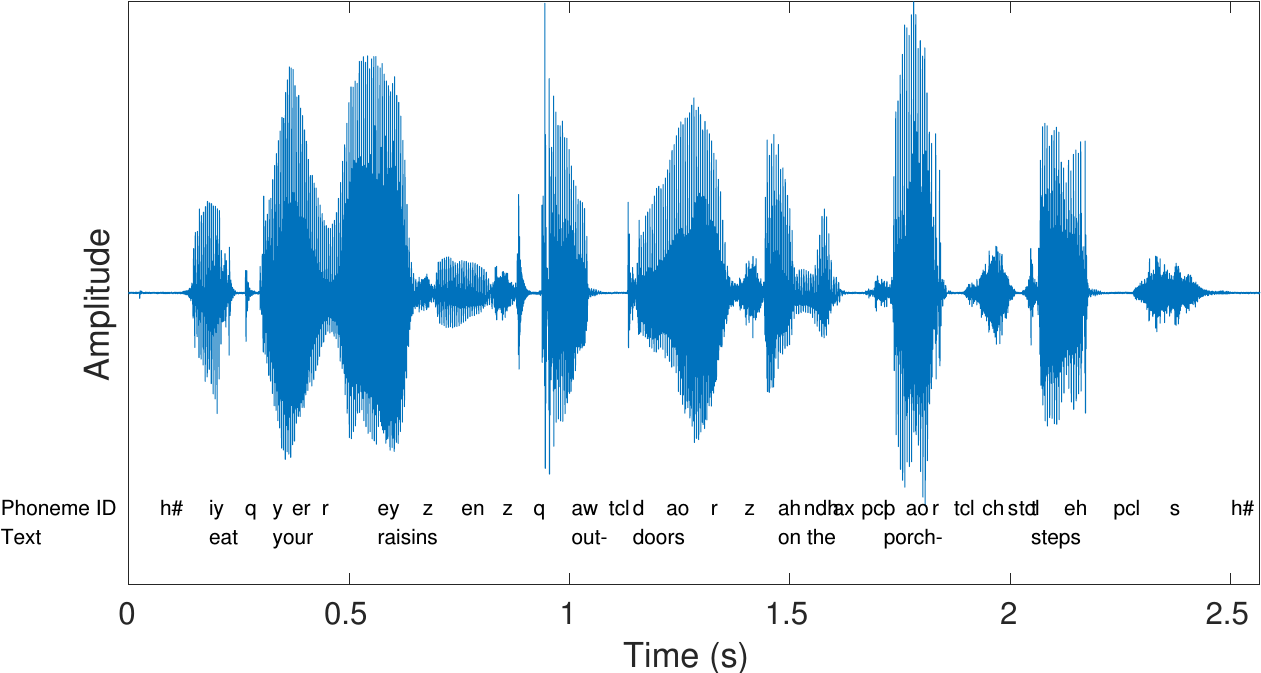


Speech sounds are acoustic signals

Emitted from the mouth

Pressure variations travelling through the air

Received by the ears

The figure on the right has an example of a speech sample, together with a time-aligned phonetic and text transcription.

The acoustic perssure waveform is captured by a microphone

The microphone converts it to an analog electric signal

Further converted to a digital signal with an AD converter

Usually a zero-mean signal (zero is average/ambient pressure level)

We will here always assume that we have access to a digital representation of the speech signal

It is a highly time-variant signal – it is more often changing then stationary

Analysis tools assume that the signal is stationary

-> Fundamental problem!

For example, if we analyze the (Fourier) spectrum of a speech signal, we would see the spectrum of a mixture of all the phonemes.

-> Not useful!

In short-time analysis of speech, the signal is split into small segments (windows).

If windows are short enough, signal is stationary

Can use standard DSP tools within window


  *why speech?*


Speech is our primary mode of communication; When you want to communicate something important, you say it face-to-face. Think about your first “I love you”, your last job interview and a nice evening with friends. Everything important is communicated in a spoken form.

Speech is about communication. A characteristic trait of humans in comparison to other animals is our refined abilities to communicate. To work efficiently as a group, we need to communicate. To learn from our mistakes, we need to communicate. Where hand waving and smoke signals can be used to communicate, speech remains as our best way to communicate abstract thoughts.

However, a common idiom is “a picture is worth a thousand words”. It is also the reason why this document has pictures on the side. They help in capturing the essential information. An important difference between speech and images is however that where pictures excel in transmission of information, speech excels in interaction. The game “Pictionary” is fun because interaction through a picture is difficult.



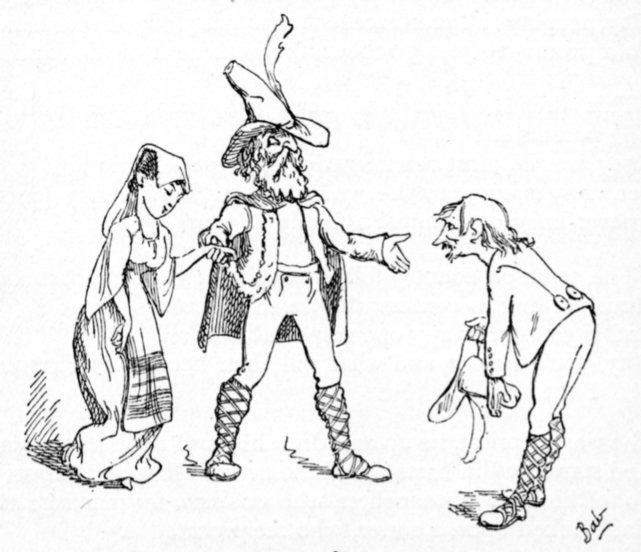

# 2-speech in frequency domain




Fundamental frequency (F0)
 Introduction
The fundamental frequency of a speech signal, often denoted by F0 or
, refers to the approximate frequency of the (quasi-)periodic structure of voiced speech signals. The oscillation originates from the vocal folds, which oscillate in the airflow when appropriately tensed. The fundamental frequency is defined as the average number of oscillations per second and expressed in Hertz. Since the oscillation originates from an organic structure, it is not exactly periodic but contains significant fluctuations. In particular, amount of variation in period length and amplitude are known respectively as jitter and shimmer. Moreover, the F0 is typically not stationary, but changes constantly within a sentence. In fact, the F0 can be used for expressive purposes to signify, for example, emphasis and questions.

Typically fundamental frequencies lie roughly in the range 80 to 450 Hz, where males have lower voices than females and children. The F0 of an individual speaker depends primarily on the length of the vocal folds, which is in turn correlated with overall body size. Cultural and stylistic aspects of speech naturally have also a large impact.

The fundamental frequency is closely related to pitch, which is defined as our perception of fundamental frequency. That is, the F0 describes the actual physical phenomenon, whereas pitch describes how our ears and brains interpret the signal, in terms of periodicity. For example, a voice signal could have an F0 of 100 Hz. If we then apply a high-pass filter to remove all signal components below 450 Hz, then that would remove the actual fundamental frequency. The lowest remaining periodic component would be 500 Hz, which correspond to the fifth harmonic of the original F0. However, a human listener would then typically still perceive a pitch of 100 Hz, even if it does not exist anymore. The brain somehow reconstructs the fundamental from the upper harmonics. This well-known phenomenon is however still not completely understood.

A speech signal with a fundamental frequency of approximately F0=93Hz.



In [ ]:
from google.colab import files
uploaded = files.upload()



Saving 175515681 (99).png to 175515681 (99) (1).png


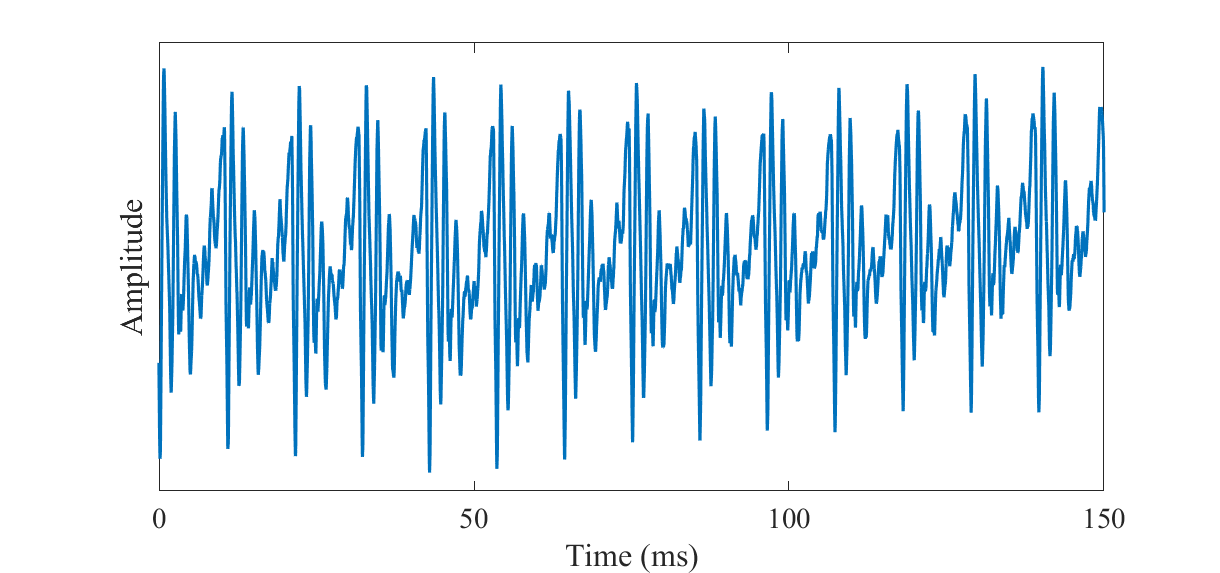

In [ ]:
from IPython.display import Image
Image( '175515681 (99).png')

The spectrum of a speech signal with a fundamental frequency of approximately F0=93Hz (original) and a high-pass filtered version of it such that the fundamental frequency has been removed (high-pass filtered).


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving 175515679.png to 175515679 (1).png


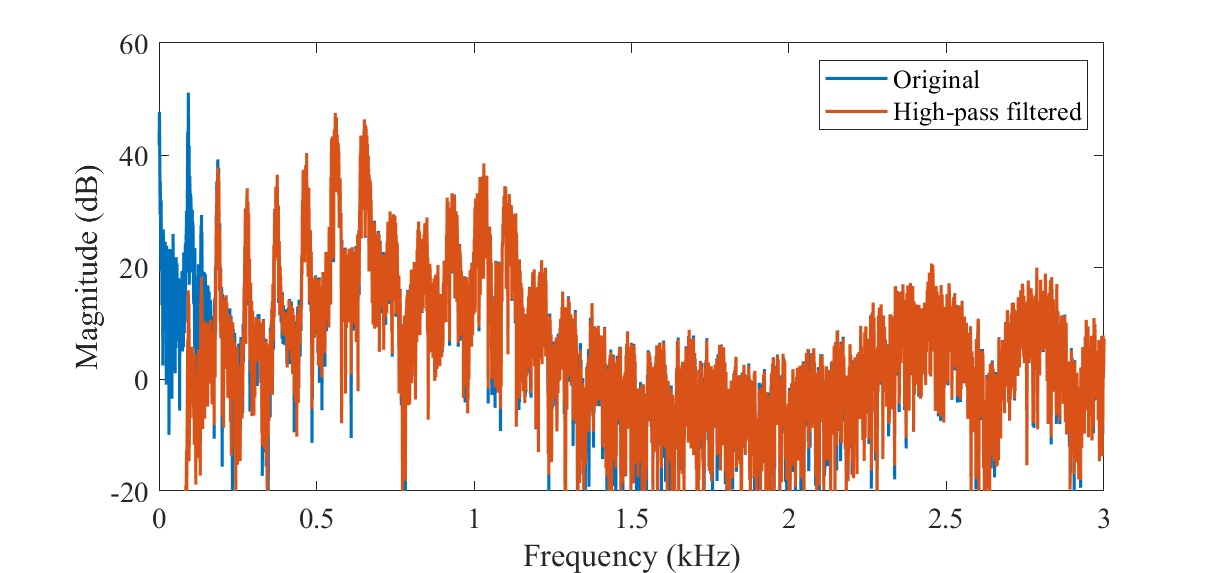

In [ ]:
from IPython.display import Image
Image('175515679.png')

A speech signal with a fundamental frequency of approximately F0=93Hz



In [ ]:
from google.colab import files
uploaded = files.upload()
import IPython.display as ipd
ipd.Audio('download.wav')

Saving download.wav to download.wav




If $F_{0}$ is the fundamental frequency, then the length of a
single period in seconds is

$$ T=\frac{1}{F_0}. $$

The speech waveform thus repeats itself after every $T$ seconds.

A simple way of modelling the fundamental frequency is to repeat the
signal after a delay of $T$ seconds. If a signal is sampled with a
sampling rate of $F_{s}$, then the signal repeats after a delay
of $L$ samples where

$$ L = F_s T = \frac{F_s}{F_0}. $$

A signal $x_{n}$ then approximately repeats itself such that

$$ x_n \approx x_{n-L} \approx x_{n-2L} \approx x_{n-3L}. $$

In the Z-domain this can be modelled by an IIR-filter as

$$ B(z) = 1 - \gamma_L z^{-L}, $$

where the scalar $ 0\leq\gamma_L\leq 1 $ scales with the accuracy
of the period. The Z-transform of the signal $x_{n}$ can then be
written as $ X(z)=B^{-1}(z) E(z), $ where $E(z)$ is the Z-transform
of a single period.

Segment of a speech signal, with the period length $L$, and fundamental
frequency $F_0=1/L$.




In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 175515678.png to 175515678.png


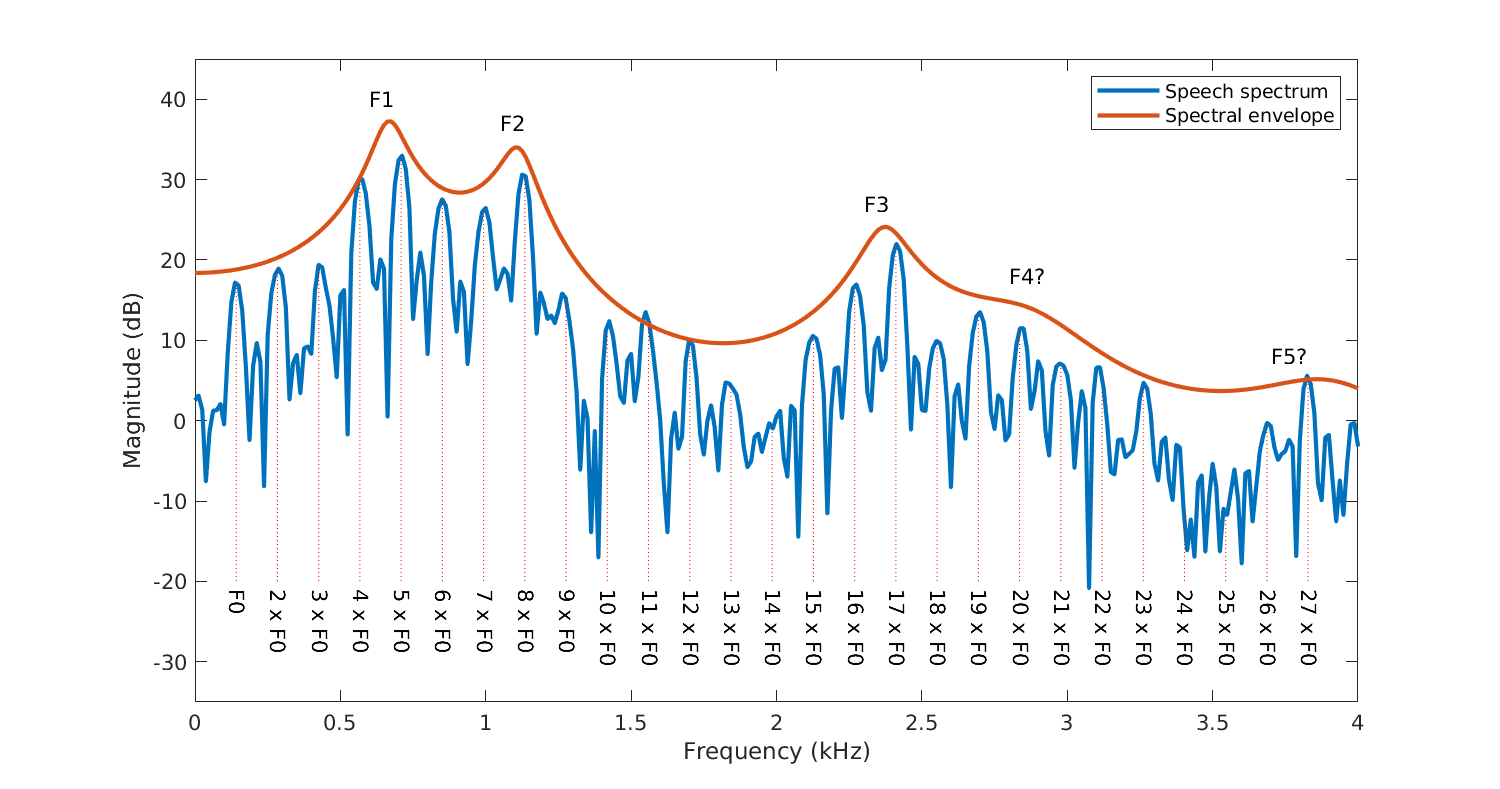

In [ ]:
from IPython.display import Image
Image('175515678.png')

Spectrum of speech signal with the fundamental frequency F0 and harmonics kF0, as well as the formants F1, F2, F3... Notice how the harmonics form a regular comb-structure.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 149891452.png to 149891452.png


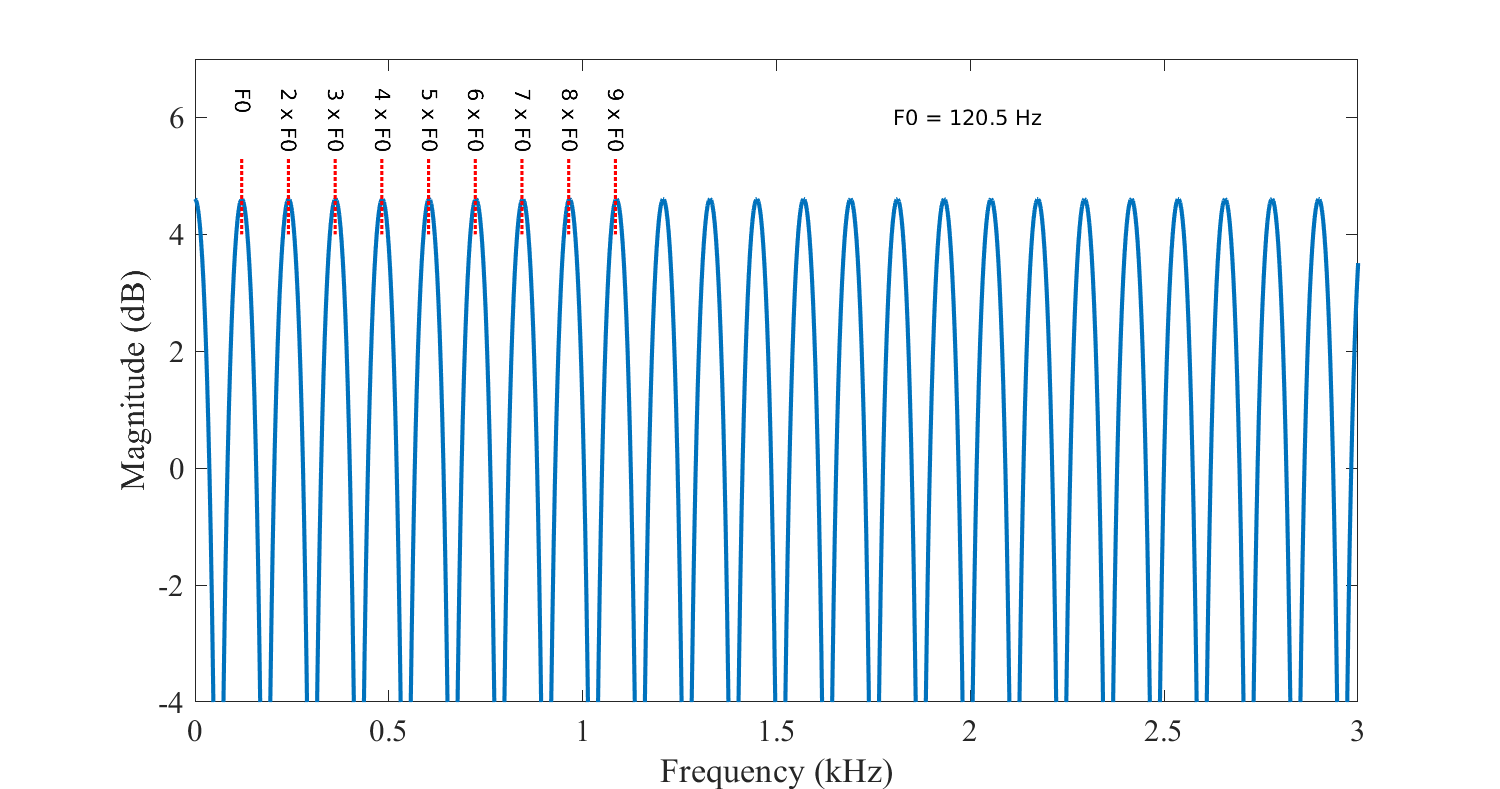

In [ ]:
from IPython.display import Image
Image('149891452.png')





  

The magnitude spectrum of $B^{-1}(z)$, has then a periodic
comb-structure. That is, the magnitude spectrum has peaks at $ k\,F_0
$ , for integer $k$.
For a discussion about the fundamental frequency in the cepstral
domain, see [Cepstrum and MFCC](content:mfcc).


Spectrum of fundamental frequency model $B^{-1}(z)$, showing the
characteristic comb-structure with harmonic peaks appearing at integer
multiples of $F0$.



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving download77.png to download77.png


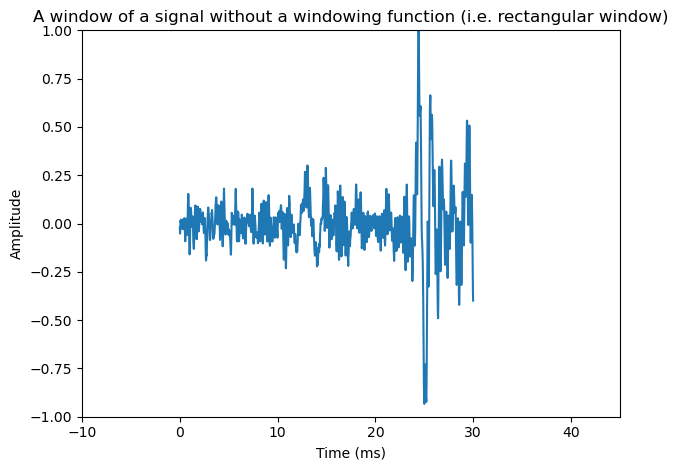

In [ ]:
from IPython.display import Image
Image('download77.png')

# 3- Spectrogram



Spectrographic analysis of speech is one of the most widely used techniques for studying the acoustic-phonetic characteristics of different sound units in a language. It is an extension of the short-term spectral analysis, and primarily involves representation of the 3-D spectral information obtained by computing the magnitude spectrum over short overlapped window segments, i.e., 2-D spectral content varying with respect to time. The 3-D spectral information is represented on a 2-D plane with the X-axis representing time, Y-axis representing frequency, and the third dimension denoting the log-magnitude of the sinusoidal frequency components is converted to a proportional intensity of gray value. The resulting representation is referred to as a spectrogram.

Two popular spectrographic representations used for analysis are wideband spectrogram and narrowband spectrogram, depending on the spectral and temporal resolution preserved in the final representation in the frequency domain. In wideband (WB) spectrograms, the spectral information is averaged over frequency windows of bandwidths 100 to 200 Hz. The corresponding time window chosen is 5 to 10 ms, so as to maintain unit time-bandwidth product. An example of a wideband spectrogram computed with a time domain window size of 5 ms and a shift of 2.5

Spectrograms are immensely useful tools that we can use to help dissect information from audio files and process it into images. In a spectrogram, the horizontal axis represents time, the vertical axis represents frequency, and the color intensity represents the amplitude of a frequency at a certain point in time. In case you can’t quite picture that, here is an example of what a spectrogram looks like:

A spectrogram is a visual representation of the frequency content of a signal as it changes over timeFor a speech signal, the spectrogram shows how different speech sounds (like vowels and consonants) havedifferent frequency patterns

X-axis → Time (seconds)

Y-axis → Frequency (Hz)

Color/Intensity → Amplitude or energy at that frequency and time.

Spectrograms are very important in speech analysis, speech recognition, and audio processing because theyshow both what frequencies are present and when they appear.

When looking at speech in a spectrogram, many important features of the signal can be clearly observed:

*Horizontal lines in a comb-structure correspond to the fundamental frequency.

*Vertical lines correspond to abrupt sounds, which are often characterized as transients. Typical transients in speech are stop consonants.

*Areas which have a lot of energy in the high frequencies (appears as a lighter colour), correspond to noisy sounds like fricatives.

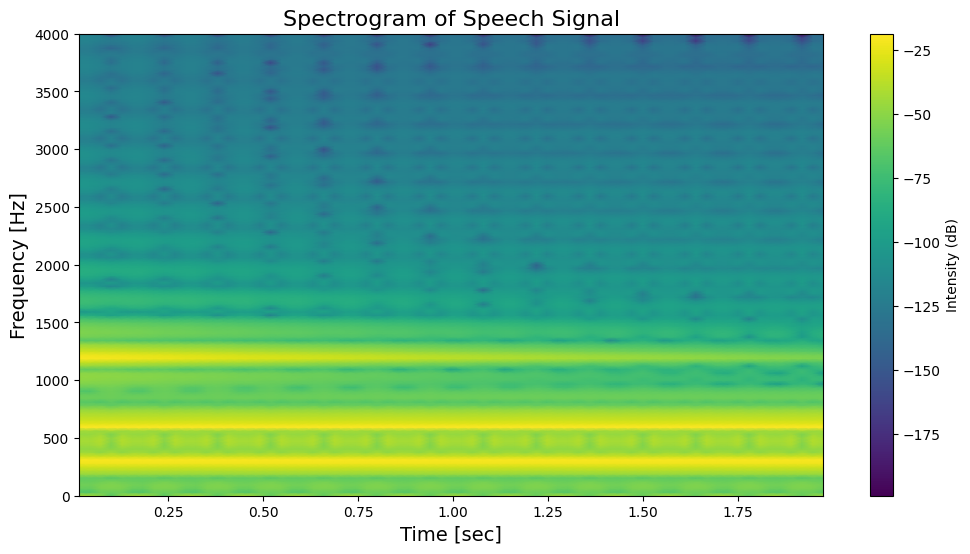

In [ ]:
# Install required packages (if not already installed)
!pip install matplotlib numpy scipy

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Create a simple speech-like signal
fs = 8000  # Sampling frequency
duration = 2  # seconds
t = np.linspace(0, duration, int(fs*duration), endpoint=False)

# Simulated speech signal (sum of sinusoids)
signal = (np.sin(2 * np.pi * 300 * t) +
          np.sin(2 * np.pi * 600 * t) +
          np.sin(2 * np.pi * 1200 * t) * np.exp(-2*t))  # Decay to simulate speech

# Compute the spectrogram
frequencies, times, Sxx = spectrogram(signal, fs)

# Plot the spectrogram
plt.figure(figsize=(12, 6))
plt.pcolormesh(times, frequencies, 10*np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Intensity (dB)')
plt.title('Spectrogram of Speech Signal', fontsize=16)
plt.ylabel('Frequency [Hz]', fontsize=14)
plt.xlabel('Time [sec]', fontsize=14)
plt.ylim(0, 4000)  # Focus on speech frequencies
plt.show()

Creating the Mel-Spectrogram
The difference between a spectrogram and a Mel-spectrogram is that a Mel-spectrogram converts the frequencies to the mel-scale. According to the University of California, the mel-scale is “a perceptual scale of pitches judged by listeners to be equal in distance from one another”². If you are familiar with playing or reading music, this may help you visualize and understand the conversion and reasoning. Let’s go ahead and picture this as notes on a musical scale:

From C to D is one whole step, and from D to E is another whole step. Perceptually to the human ears, the step sizes are equal.
However, if we were to compare these steps in hertz, they would not be equal steps. A C is around 261.63 Hz, a D is 293.66 Hz, and an E is 329.63 Hz.
C to D difference = 32.03 Hz
D to E difference = 35.37 Hz
As the notes go higher in octave, the difference between the steps dramatically increases. Mel-spectrograms provide a perceptually relevant amplitude and frequency representation. Let’s go ahead and plot a Mel-spectrogram.

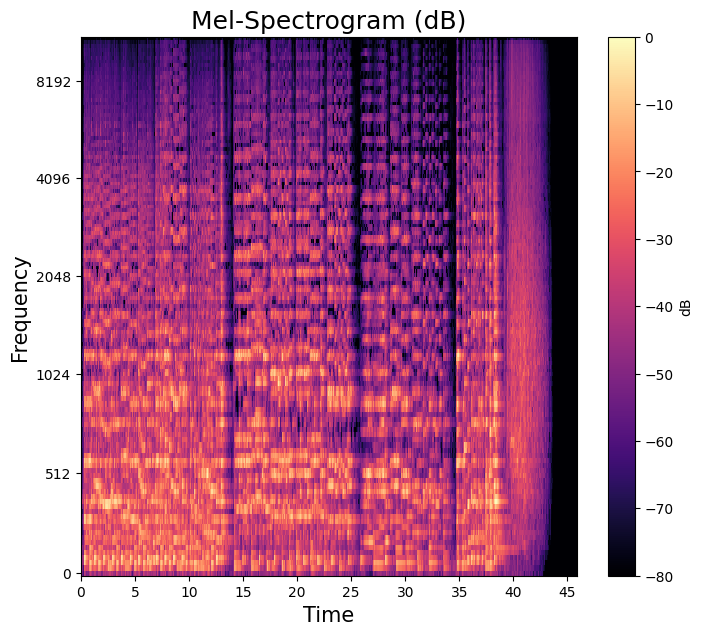

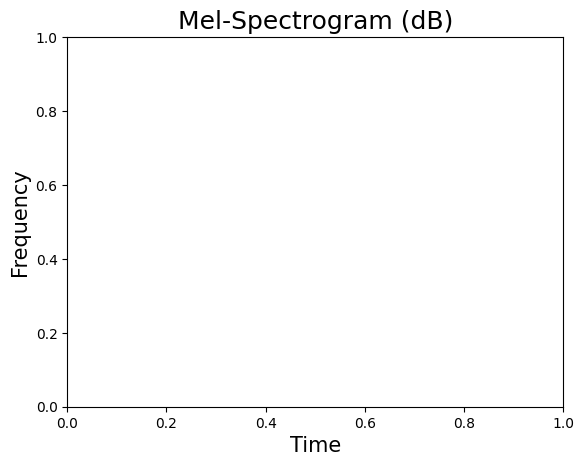

In [ ]:
# # @title Default title text

import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
signal, sr = librosa.load(librosa.util.example('brahms'))

# Define hop_length and n_fft before using them
hop_length = 512
n_fft = 2048

mel_signal = librosa.feature.melspectrogram(y=signal, sr=sr, hop_length=hop_length,
                                             n_fft=n_fft)
spectrogram = np.abs(mel_signal)
# @title Default title text

# (Rest of the code remains the same)
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
signal, sr = librosa.load(librosa.util.example('brahms'))


mel_signal = librosa.feature.melspectrogram(y=signal, sr=sr, hop_length=hop_length,
 n_fft=n_fft)
spectrogram = np.abs(mel_signal)
power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(8, 7))
librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='mel', cmap='magma',
 hop_length=hop_length)
plt.colorbar(label='dB')
plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()
plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()

# *4- Speech production model show how the model is compiled from cascaded filters to produce voiced speech*



Speech Production Model
Depending on the content of the speech signal (voiced or unvoiced) the speech signal comprises of a series of pulses (for voiced sounds) or random noise (for unvoiced sounds). This spectrum of signals moves through the vocal tract. The vocal tract behaves as a spectral shaping filter i.e. the frequency response of the vocal tract is thrust upon the incoming speech signal. The shape and size of the vocal tract defines the frequency response and hence the difference in the voices of people.

Development of an accurate speech producing model requires one to develop a speech filter based model of the human speech producing mechanism. It is presumed that the source of excitation and the vocal tract are independent of each other. Therefore, they both are modeled separately. For modelling the vocal tract it is assumed that the vocal tract has defined characteristics over a 10 ms period of time. Thus once every 10 ms, the vocal tract configuration changes, bringing about, new vocal tract parameters (i.e. resonant/formant frequencies)

To build up an accurate model for speech production, it is essential to build a speech filter based model. The model must precisely represent the following:

The excitation technique of the human speech production mechanism.
The lip-nasal voice process.
The operational intricacies of the vocal tract.
Voiced speech and
Unvoiced speech.


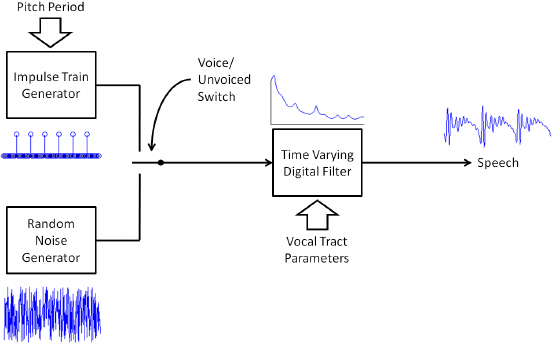

Figure 3: Simplified Speech Production Model
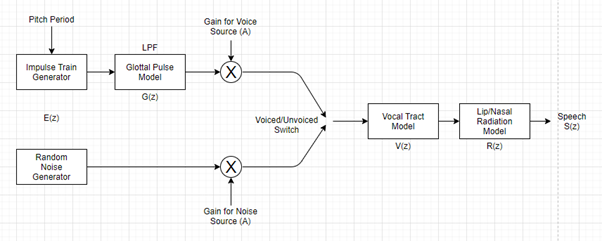

Figure 4: Overall Speech Production Model



Excitation Model: The output of the excitation function of the model will vary depending on the trait of the speech produced.

During the course of the voiced speech, the excitation will consist of a series of impulses, each spaced at an interval of the pitch period.
During the course of unvoiced speech, the excitation will be a white noise/random noise type signal.
Glottal Model: The glottal model is used exclusively for the Voiced Speech component of the human speech. The glottal flow distinguishes the speakers in speech recognition and speech synthesis mechanisms.

Gain Factor: The energy of the sound is dependent on the gain factor. Generally, the energy for the voiced speech is many times greater than that of the unvoiced speech.

Vocal Tract Model: A chain of lossless tubes (short and cylindrical in shape) form the basis/model of the vocal tract (as shown in Figure 4 below), each with its own resonant frequency. The design of the lossless tube is different for different people. The resonant frequency depends on the shape of the tube, and hence, the difference in voices for different people.



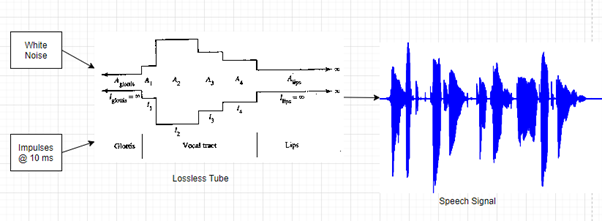




Figure 5: Vocal Tract Model




The vocal tract model described above is typically used in the low bit-rate speech codecs, speech recognition systems, speaker authentication/identification systems, and speech synthesizers as well. It is essential to derive the coefficients of the vocal tract model for every frame of speech. The typical technique used for deriving the coefficients of the vocal tract model in speech codecs is Linear Predictive Coding (LPC). LPC vocoders can achieve a bit-rate of 1.2 to 4.8 kbps and hence, is categorized into a low quality, moderate complexity, and a low bit-rate algorithm.

 Speech Production Model: How Cascaded Filters Generate Voiced Speech
The production of voiced speech sounds (such as vowels) can be effectively modeled using a cascade of filters. This approach reflects the physical process of how the human vocal apparatus creates speech:

1. Glottal Source: The vocal cords vibrate, producing a periodic or nearly periodic sound waveform known as the glottal pulse.

1. Vocal Tract Filter: The sound passes through the vocal tract (which includes the throat, mouth, and nasal cavities), which shapes the sound by emphasizing or reducing certain frequency components.

1. Radiation Effect: Finally, the sound radiates out from the lips and nose, adding further modifications that can be modeled as another filtering stage.

Together, these components form a chain of filters:

* Speech Signal = Glottal Source → Vocal Tract Filter → Radiation Filter

* The glottal source is typically approximated as a simple periodic impulse train.

* The vocal tract filter is represented by resonances called formants, which are often simulated with low-order filters.

* The radiation effect is usually modeled as a high-pass filter.

* This framework is known as the Source-Filter Model, and it is fundamental to many techniques in speech synthesis and speech signal analysis.



















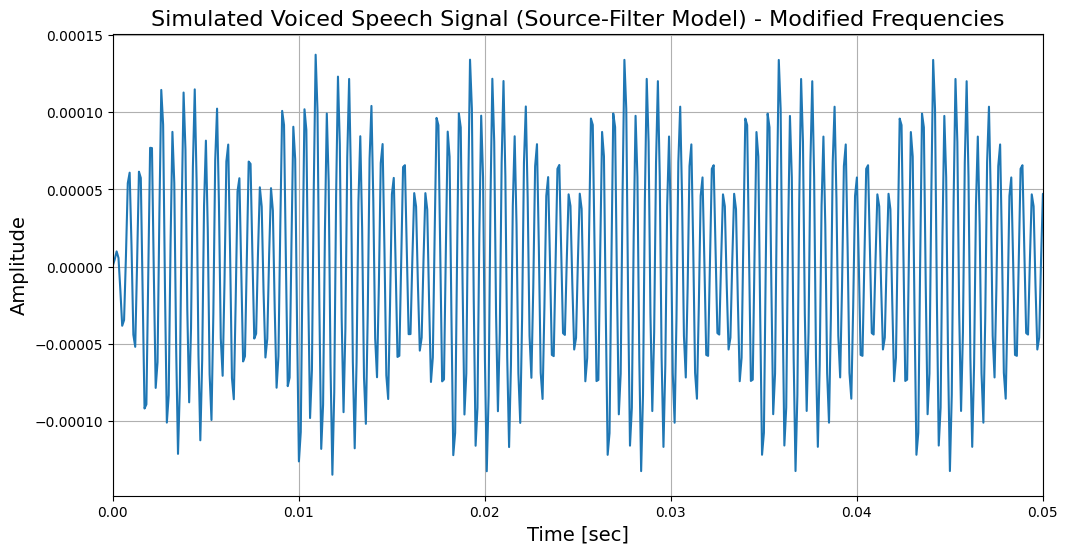

In [ ]:
# Install necessary libraries
!pip install numpy matplotlib scipy

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, butter

# Parameters
fs = 10000  # Sampling frequency (غيرته من 8000 لـ 10000 Hz)
duration = 1  # 1 second
t = np.linspace(0, duration, int(fs*duration), endpoint=False)

# Step 1: Glottal Source (Impulse train for voiced sound)
pitch_freq = 120  # 120 Hz pitch frequency (غيرته من 100 Hz لـ 120 Hz)
glottal_pulse_train = np.zeros_like(t)
glottal_pulse_train[::fs//pitch_freq] = 1  # Impulses every pitch period

# Step 2: Vocal Tract Filter (simulated using 2 resonances/formants)
# Simple bandpass filters for formants
def bandpass_filter(lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Formant 1 (around 600 Hz) -- غيرته من 400-600 لـ 550-650 Hz
b1, a1 = bandpass_filter(550, 650, fs)
# Formant 2 (around 1700 Hz) -- غيرته من 1400-1600 لـ 1650-1750 Hz
b2, a2 = bandpass_filter(1650, 1750, fs)

# Apply cascaded filters
vocal_tract_output = lfilter(b1, a1, glottal_pulse_train)
vocal_tract_output = lfilter(b2, a2, vocal_tract_output)

# Step 3: Radiation Effect (simple high-pass filter)
b_rad, a_rad = butter(1, 150/fs, btype='high')  # غيرت cutoff من 100/fs لـ 150/fs
speech_signal = lfilter(b_rad, a_rad, vocal_tract_output)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t, speech_signal)
plt.title('Simulated Voiced Speech Signal (Source-Filter Model) - Modified Frequencies', fontsize=16)
plt.xlabel('Time [sec]', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.xlim(0, 0.05)  # Zoom to show some pitch periods
plt.grid()
plt.show()


# Music classification and generation with spectrograms



---




This notebook loads the GTZAN dataset which includes audiofiles and spectrograms. You can use this dataset or find your own. The first part of the notebook is all about data visualization and show how to make spectrograms from audiofiles. The second part of the notebook includes a CNN that is trained on the spectrograms to predict music genre. Below we also provide links to tutorials and other resources if you want to try to do some of the harder project ideas.

Have fun :)


In [ ]:
# @title Install dependencies
# !sudo apt-get install -y ffmpeg --quiet
!pip install librosa --quiet
!pip install imageio --quiet
!pip install imageio-ffmpeg --quiet

In [ ]:
# Import necessary libraries.
import os
import glob
import imageio
import random, shutil
import torch
import torch.nn as nn
from tqdm.notebook import tqdm
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import librosa
import librosa.display

In [ ]:
import requests

fname = "music.zip"
url = "https://osf.io/drjhb/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

## Loading GTZAN dataset (includes spectrograms)

The GTZAN dataset for music genre classification can be dowloaded from [Kaggle](https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification).

To download from Kaggle using this code you need to download and copy over your api token. In Kaggle go to the upper right side -> account -> API -> create API token. This downloads a json file. Copy the content into api_token. It should look like this:

api_token = {"username":"johnsmith","key":"123a123a123"}

In [ ]:
from zipfile import ZipFile

with ZipFile(fname, 'r') as zipObj:
  # Extract all the contents of zip file in different directory
  zipObj.extractall()

## Have a look at the data

In this section we are looking at an example of an audio waveform. Then we'll transform the sound wave to a spectrogram and compare it with the spectrogram that was included with the downloaded dataset.

In [ ]:
# Inspect an audio file from the dataset.

sample_path = 'Data/genres_original/jazz/jazz.00000.wav'

# if you want to listen to the audio, uncomment below.
display.Audio(sample_path)

y: [-0.00924683 -0.01177979 -0.01370239 ...  0.0071106   0.00561523
  0.00561523] 

y shape: (661794,) 

Sample rate (KHz): 22050 

Length of audio: 30.013333333333332


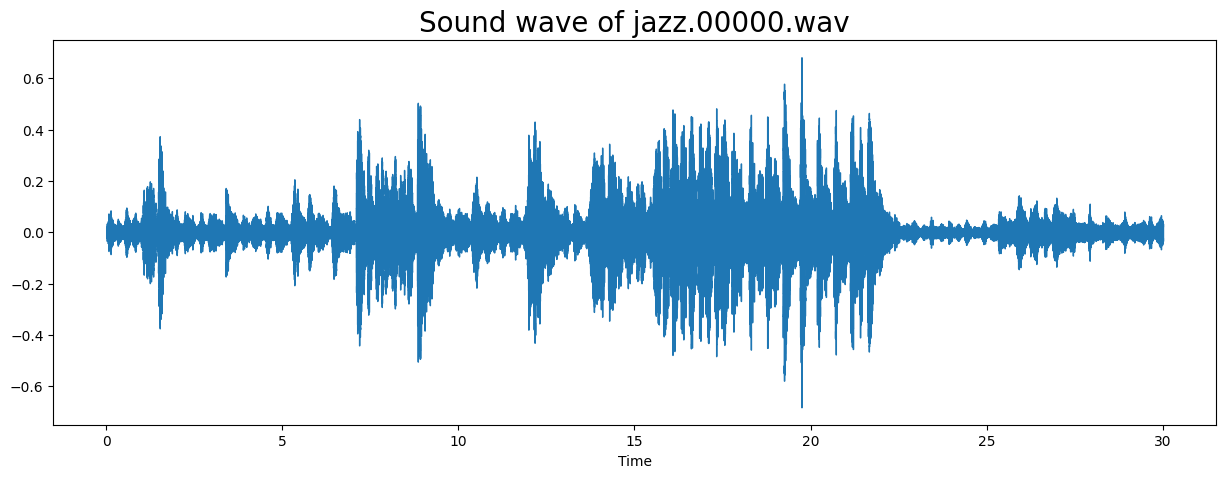

In [ ]:
y, sample_rate = librosa.load(sample_path)

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample rate (KHz):', sample_rate, '\n')
print(f'Length of audio: {np.shape(y)[0]/sample_rate}')

# Plot th sound wave.

plt.figure(figsize=(15, 5))
librosa.display.waveshow(y=y, sr=sample_rate);
plt.title("Sound wave of jazz.00000.wav", fontsize=20)
plt.show()

Shape of D object: (1025, 1293)


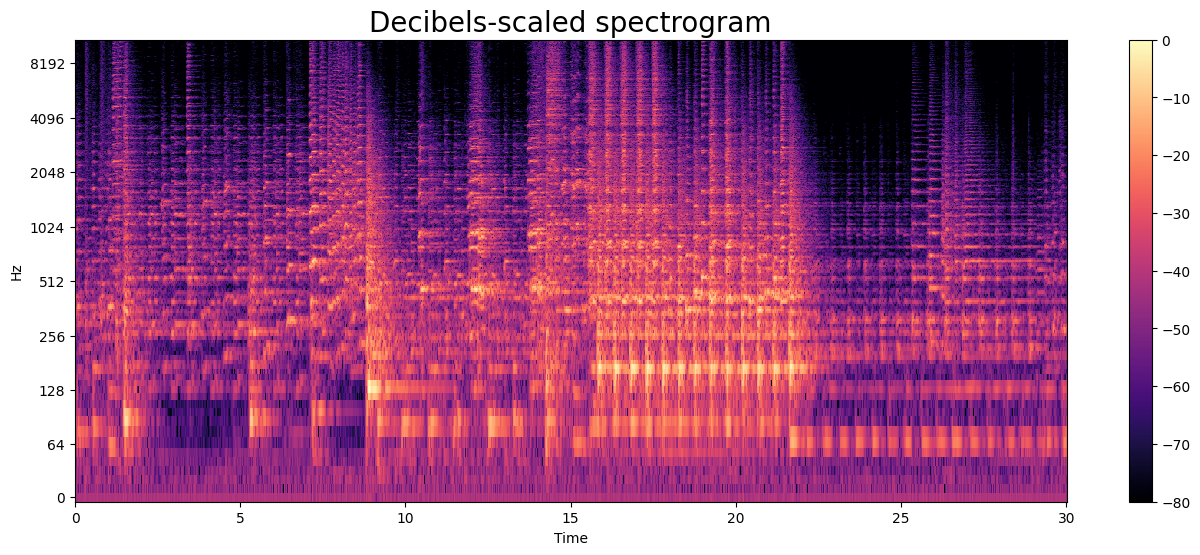

In [ ]:
# Convert sound wave to spectrogram.

# Short-time Fourier transform (STFT).

D = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))
print('Shape of D object:', np.shape(D))

# Convert amplitude spectrogram to Decibels-scaled spectrogram.

DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the spectogram.

plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr=sample_rate, hop_length=512,
                         x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Decibels-scaled spectrogram', fontsize=20)
plt.show()

The mel spectrogram uses mel sclae intead of a linear one: [mel scale](https://en.wikipedia.org/wiki/Mel_scale) is a perceptual scale of pitches judged by listeners to be equal in distance from one another. The reference point between this scale and normal frequency measurement is defined by assigning a perceptual pitch of 1000 mels to a 1000 Hz tone, 40 dB above the listener's threshold. Above about 500 Hz, increasingly large intervals are judged by listeners to produce equal pitch increments.

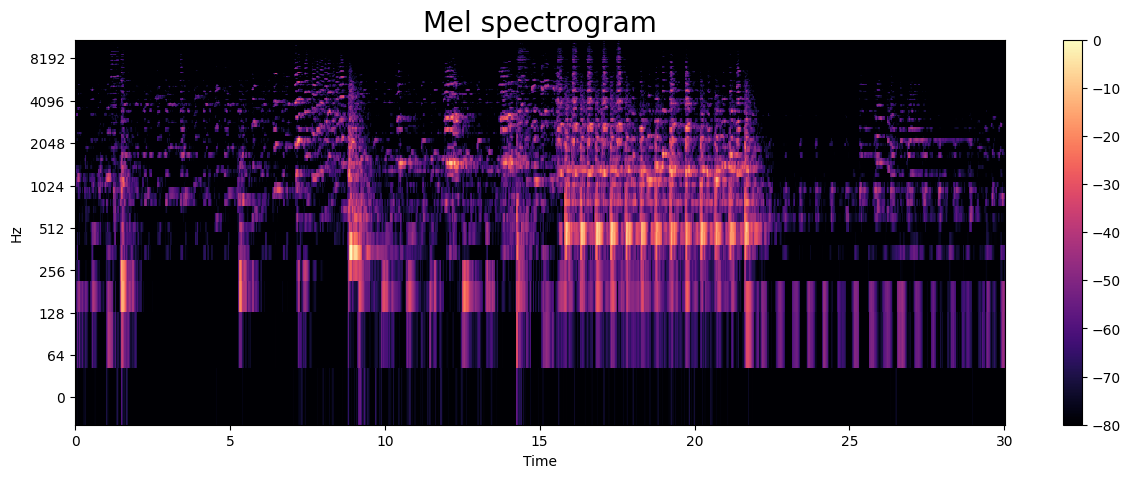

In [ ]:
# Convert sound wave to mel spectrogram.

y, sr = librosa.load(sample_path)

S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(15, 5))
librosa.display.specshow(S_DB, sr=sr, hop_length=512,
                         x_axis='time', y_axis='log')
plt.colorbar()
plt.title("Mel spectrogram", fontsize=20)
plt.show()

<ipython-input-9-336fea512865>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


(288, 432, 4)


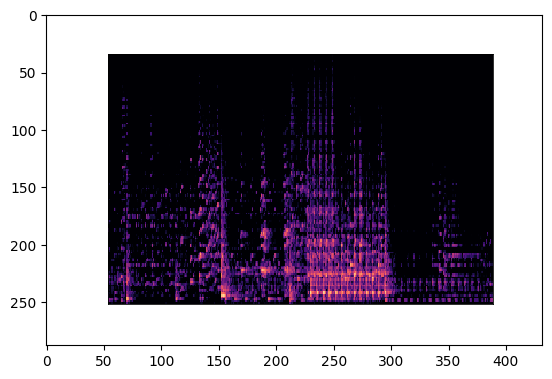

In [ ]:
# Visualize the mel spectrogram of the same sample from the dataset.

img_path = 'Data/images_original/jazz/jazz00000.png'
img = imageio.imread(img_path)
print(img.shape)

plt.imshow(img, interpolation='nearest')
plt.show()

# 5-Illustrate popular features pitch , Reflection coefficients, Energy and Zero crossing







 1. **Pitch (Fundamental Frequency)**

* Pitch refers to the basic frequency at which the vocal cords vibrate during speech production.

* It determines the perceived highness or lowness of the voice. Faster vibrations correspond to higher pitch, and slower vibrations mean lower pitch.

* Pitch is typically measured in Hertz (Hz).

Code explanation:

We detect the peaks in the speech waveform using a peak-finding function. The time intervals between consecutive peaks give the period, and the inverse of the period gives the pitch frequency.



 2. **Reflection Coefficients**

* These coefficients come from Linear Predictive Coding (LPC), which models how the vocal tract shapes the sound.

* They quantify how much of the sound wave is reflected at different points inside the vocal tract.

* Reflection coefficients characterize the filter properties of the vocal tract during speech.

Code explanation:

By computing the autocorrelation of the signal and extracting the first few values, we get an approximate representation of the reflection coefficients.


 3. Energy

* Energy in a speech signal relates to the signal's power or loudness over time.

* Higher energy values correspond to louder sounds, while lower values indicate quieter speech.

Code explanation:

Energy is calculated by squaring the amplitude of the speech signal, which effectively measures the power of the signal.


4. Zero Crossing Rate (ZCR)

* A zero crossing occurs when the signal changes its sign, crossing the zero amplitude line.

* ZCR measures how often these crossings happen per unit time and helps differentiate between voiced and unvoiced speech sounds.

Code explanation:

We use the sign of the signal samples and count how many times the sign changes, which indicates zero crossings. The count normalized over time gives the zero crossing rate.





Zero-crossing rate

By looking at different speech and audio waveforms, we can see that
depending on the content, they vary a lot in their smoothness. For
example, voiced speech sounds are more smooth than unvoiced ones.
Smoothness is thus a informative characteristic of the signal.

A very simple way for measuring smoothness of a signal is to calculate
the number of zero-crossing within a segment of that signal. A voice
signal oscillates slowly - for example, a 100 Hz signal will cross zero
100 per second - whereas an unvoiced fricative can have 3000 zero
crossing per second. An implementation of the zero-crossing for a signal $x_h$ at window $k$ is

$$
ZCR_k = \sum_{h=kM}^{kM+N} \left|{\mathrm{sign}}(x_h)-{\mathrm{sign}}(x_{h-1})\right|,
$$

where $M$ is the step between analysis windows and $N$ the analysis window length.

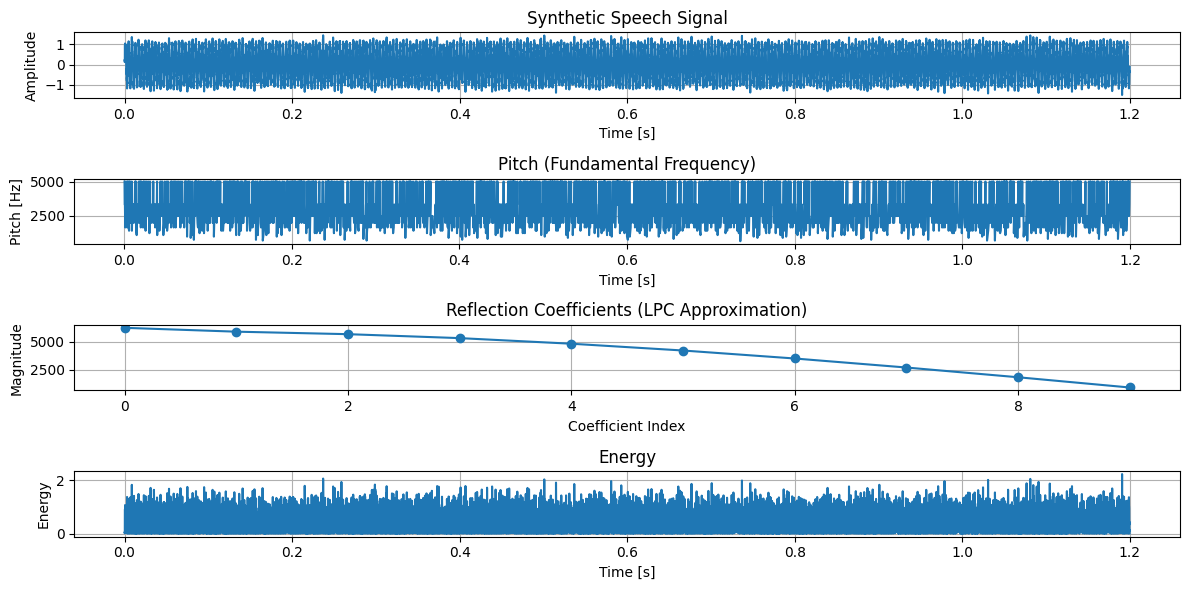

Zero Crossing Rate: 0.06891666666666667 crossings per second


In [ ]:
# Install necessary libraries
!pip install numpy matplotlib scipy

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Parameters
fs = 10000  # Sampling frequency (was 8000)
duration = 1.2  # Duration in seconds (was 1.0)
t = np.linspace(0, duration, int(fs*duration), endpoint=False)

# Generate a synthetic speech-like signal (sine wave + noise)
frequency = 250  # Pitch frequency (was 200 Hz)
signal = np.sin(2 * np.pi * frequency * t) + 0.15 * np.random.randn(len(t))  # Voiced signal with noise

# Plot the signal
plt.figure(figsize=(12, 6))
plt.subplot(4, 1, 1)
plt.plot(t, signal)
plt.title("Synthetic Speech Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# Feature 1: Pitch (Fundamental Frequency) - Detect peaks (periods)
peaks, _ = find_peaks(signal)
pitch = fs / np.diff(peaks)  # Calculate pitch (fundamental frequency)

# Adjust x-axis for pitch (use t[peaks])
plt.subplot(4, 1, 2)
plt.plot(t[peaks[:-1]], pitch)  # Only plot the pitch for the peaks
plt.title("Pitch (Fundamental Frequency)")
plt.xlabel("Time [s]")
plt.ylabel("Pitch [Hz]")
plt.grid(True)

# Feature 2: Reflection Coefficients (using LPC as approximation)
from scipy.linalg import toeplitz
# Approximate reflection coefficients (simplified for illustration)
order = 10  # LPC order (was 8)
R = np.correlate(signal, signal, mode='full')[len(signal)-1:]  # Autocorrelation
R = R[:order]  # Get the first 'order' autocorrelations
plt.subplot(4, 1, 3)
plt.plot(np.arange(order), R, 'o-')
plt.title("Reflection Coefficients (LPC Approximation)")
plt.xlabel("Coefficient Index")
plt.ylabel("Magnitude")
plt.grid(True)

# Feature 3: Energy - Calculate energy over time
energy = np.square(signal)  # Simple energy calculation (squared signal)
plt.subplot(4, 1, 4)
plt.plot(t, energy)
plt.title("Energy")
plt.xlabel("Time [s]")
plt.ylabel("Energy")
plt.grid(True)

plt.tight_layout()
plt.show()

# Feature 4: Zero Crossing Rate (Count zero crossings)
zero_crossings = np.where(np.diff(np.sign(signal)))[0]
zero_cross_rate = len(zero_crossings) / len(t)  # Zero crossing rate
print(f"Zero Crossing Rate: {zero_cross_rate} crossings per second")


In [ ]:
from google.colab import files
uploaded = files.upload()
import IPython.display as ipd
ipd.Audio('download (7).wav')

Saving download (7).wav to download (7) (1).wav


Saving download (7).wav to download (7) (2).wav


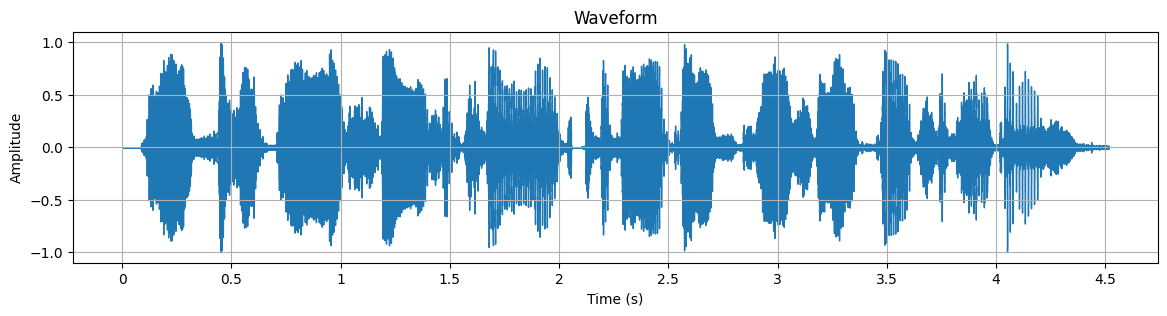

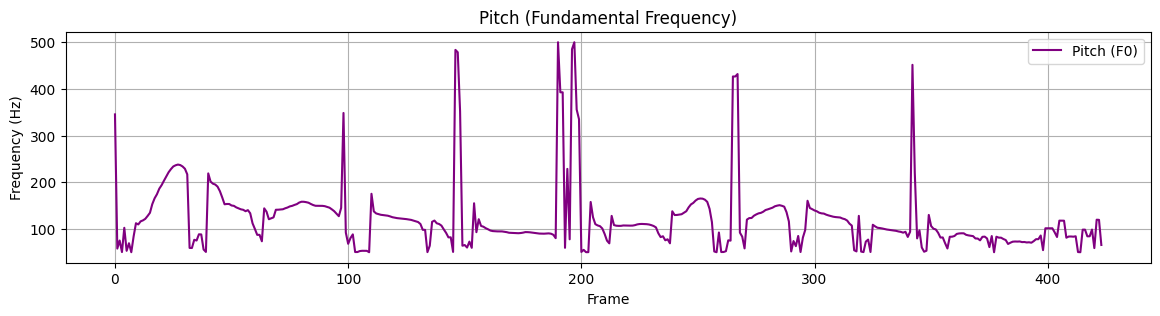

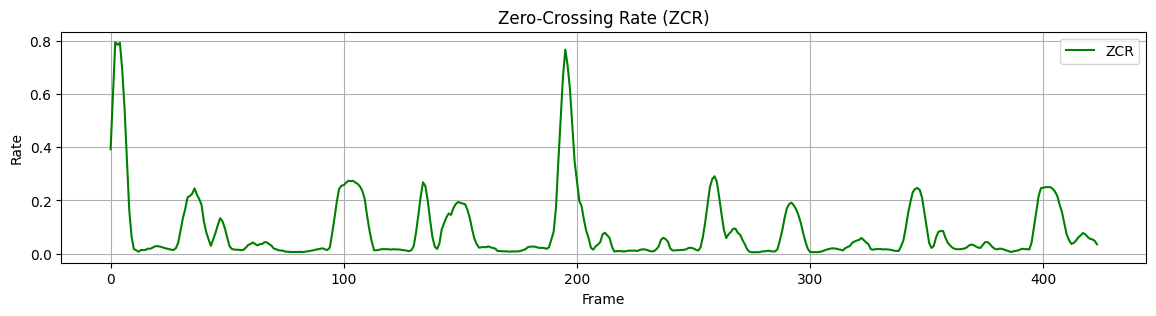

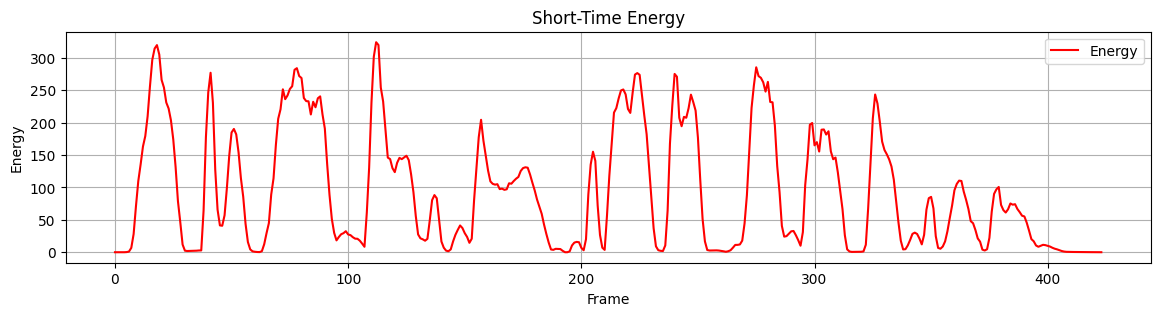

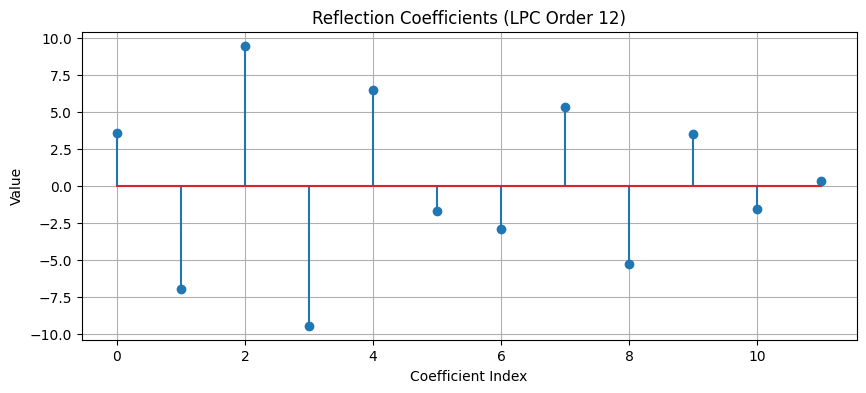

In [ ]:
!pip install librosa matplotlib numpy scipy --quiet

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]

y, sr = librosa.load(filename, sr=None)
frame_length = 2048
hop_length = 512

# -------------------------------
# 1. Plot Waveform
# -------------------------------
plt.figure(figsize=(14, 3))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# -------------------------------
# 2. Pitch (F0) باستخدام YIN
# -------------------------------
f0 = librosa.yin(y, fmin=50, fmax=500, sr=sr, frame_length=frame_length, hop_length=hop_length)
plt.figure(figsize=(14, 3))
plt.plot(f0, label="Pitch (F0)", color='purple')
plt.title('Pitch (Fundamental Frequency)')
plt.xlabel('Frame')
plt.ylabel('Frequency (Hz)')
plt.grid()
plt.legend()
plt.show()

# -------------------------------
# 3. Zero-Crossing Rate
# -------------------------------
zcr = librosa.feature.zero_crossing_rate(y, frame_length=frame_length, hop_length=hop_length)[0]
plt.figure(figsize=(14, 3))
plt.plot(zcr, label="ZCR", color='green')
plt.title('Zero-Crossing Rate (ZCR)')
plt.xlabel('Frame')
plt.ylabel('Rate')
plt.grid()
plt.legend()
plt.show()

# -------------------------------
# 4. Short-Time Energy
# -------------------------------
energy = np.array([
    np.sum(np.square(y[i:i+frame_length]))
    for i in range(0, len(y), hop_length)
])
plt.figure(figsize=(14, 3))
plt.plot(energy, label="Energy", color='red')
plt.title('Short-Time Energy')
plt.xlabel('Frame')
plt.ylabel('Energy')
plt.grid()
plt.legend()
plt.show()

# -------------------------------
# 5. LPC و Reflection Coefficients
# -------------------------------
order = 12
lpc_coeffs = librosa.lpc(y, order=order)
reflection_coeffs = -lpc_coeffs[1:]  # Ignoring the first term (gain)

plt.figure(figsize=(10, 4))
# إزالة الوسيط المهمل 'use_line_collection'
plt.stem(reflection_coeffs)
plt.title(f'Reflection Coefficients (LPC Order {order})')
plt.xlabel('Coefficient Index')
plt.ylabel('Value')
plt.grid()
plt.show()


# 6- Illustrate cepestrum domain

  * The Cepstrum is a powerful signal processing technique widely used in speech analysis and recognition. It helps to decompose a speech signal into components related to the source (like vocal cord vibrations) and the filter (vocal tract characteristics).

**What is the Cepstrum?**

  * The Cepstrum is obtained by applying the Fourier Transform to the logarithm of the magnitude spectrum of a signal.

* This process separates the slow variations (like the envelope caused by vocal tract filtering) from the fast variations (pitch or fundamental frequency).

* In other words, it helps isolate pitch information and formants from the speech spectrum.

**How to calculate the Cepstrum:**

* Fourier Transform (FFT): Convert the time-domain signal to frequency domain.

* Logarithm: Take the logarithm of the spectrum magnitude to highlight spectral features.

* Inverse Fourier Transform (IFFT): Convert back to the time-like domain, resulting in the Cepstrum.

**Applications:**
* Speaker identification and verification.

* Speech recognition.

* Speech synthesis and enhancement.

 Code Explanation:

* We generate a synthetic speech-like signal combining a sine wave and noise.

* Compute the FFT to get the frequency spectrum.

*  Take the log of the magnitude spectrum to emphasize important spectral characteristics.

* Apply the IFFT on the log spectrum to get the Cepstrum.

* Plot the original signal, its magnitude spectrum, and the resulting Cepstrum.



  Code Example:




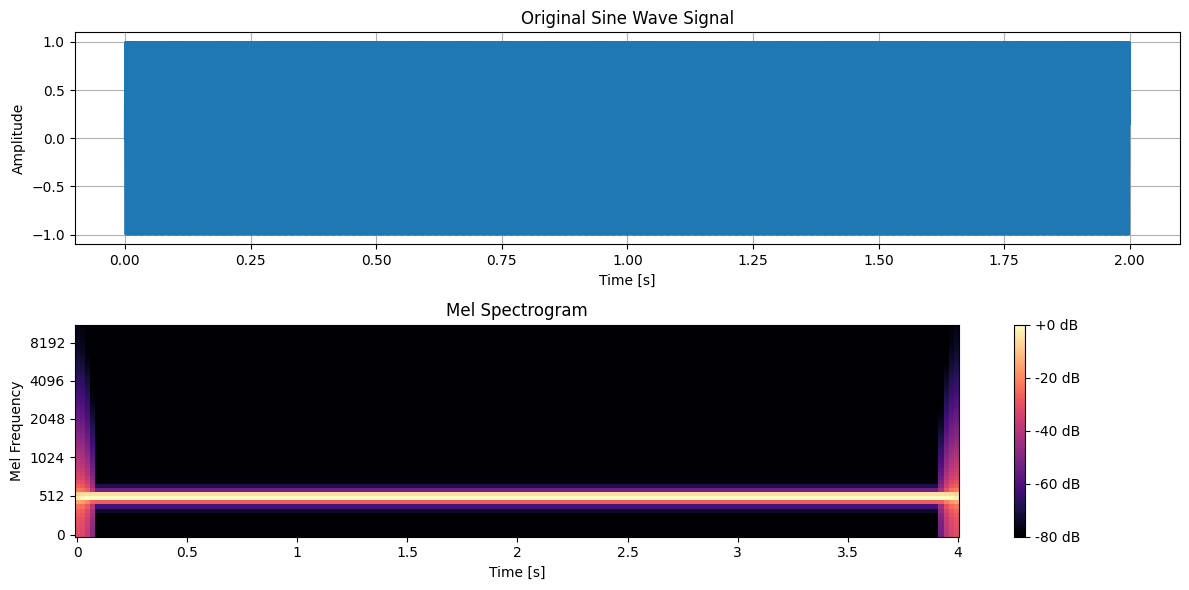

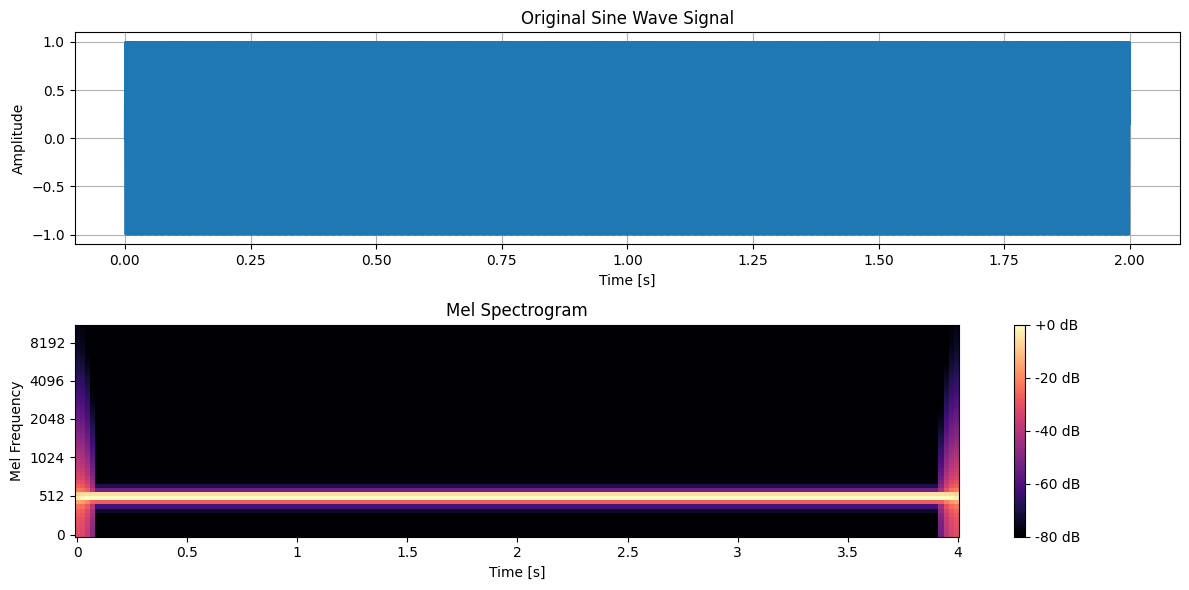

In [ ]:
# Install necessary libraries
!pip install numpy matplotlib scipy librosa

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Parameters
fs = 22050
duration = 2
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Create a simple sine wave (speech-like signal)
frequency = 523.25
signal = np.sin(2 * np.pi * frequency * t)  # A pure sine wave signal

# Plot the original signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Original Sine Wave Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# Step 1: Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(signal, n_fft=2048, hop_length=256)

# Step 2: Convert the magnitude spectrogram to Mel scale using librosa
mel_spectrogram = librosa.feature.melspectrogram(S=np.abs(D)**2, sr=fs, n_mels=64, fmax=11025)

# Plot Mel spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), x_axis='time', y_axis='mel', sr=fs)
plt.title("Mel Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.xlabel("Time [s]")
plt.ylabel("Mel Frequency")
plt.tight_layout()
plt.show()

# Install necessary libraries
!pip install numpy matplotlib scipy librosa

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Parameters
fs = 22050
duration = 2
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Create a simple sine wave
frequency = 523.25  # Frequency in Hz
signal = np.sin(2 * np.pi * frequency * t)  # A pure sine wave signal

# Plot the original signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Original Sine Wave Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# Step 1: Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(signal, n_fft=2048, hop_length=256)

# Step 2: Convert the magnitude spectrogram to Mel scale using librosa
mel_spectrogram = librosa.feature.melspectrogram(S=np.abs(D)**2, sr=fs, n_mels=64, fmax=11025)
# Plot Mel spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), x_axis='time', y_axis='mel', sr=fs)
plt.title("Mel Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.xlabel("Time [s]")
plt.ylabel("Mel Frequency")
plt.tight_layout()
plt.show()

# Mel scale example: frequency to Mel conversion
def hz_to_mel(frequency):
    return 2595 * np.log10

# 7- Mel scale




* The Mel scale is a perceptual scale that represents how humans perceive the pitch of sounds. Unlike linear frequency scales, the Mel scale captures the non-linear way our ears interpret pitch — sounds at lower frequencies are perceived with more detail, while higher frequencies are perceived more compressed.

* The scale is designed to approximate the human auditory system’s response, making it very useful in fields like speech and audio processing.

* The Mel scale is mathematically defined as:

   Mel=2595×log
10
​
 (1+
f/700)


  Where:

𝑓
f is the frequency in Hertz (Hz).

Mel
(
𝑓
)
Mel(f) is the corresponding value on the Mel scale.


**Why is the Mel Scale Useful?**

* It aligns frequency representation with human hearing perception.

* It compresses higher frequencies into fewer bins, reflecting how humans are less sensitive to changes at high frequencies.

* It is widely used in speech processing techniques such as Mel-Frequency Cepstral Coefficients (MFCCs), which are essential features for speech recognition systems.


**Mel Filterbank**

A Mel filterbank consists of multiple overlapping triangular filters spaced according to the Mel scale. When applied to a spectrum, it converts linear frequency bins into Mel frequency bins, emphasizing frequencies as perceived by humans.

The filterbank typically covers a frequency range from 0 Hz up to the Nyquist frequency (half the sampling rate), dividing this range into Mel-spaced frequency bands.


   
   
   
   
   
   
   
   
   
   
   
   
   
  

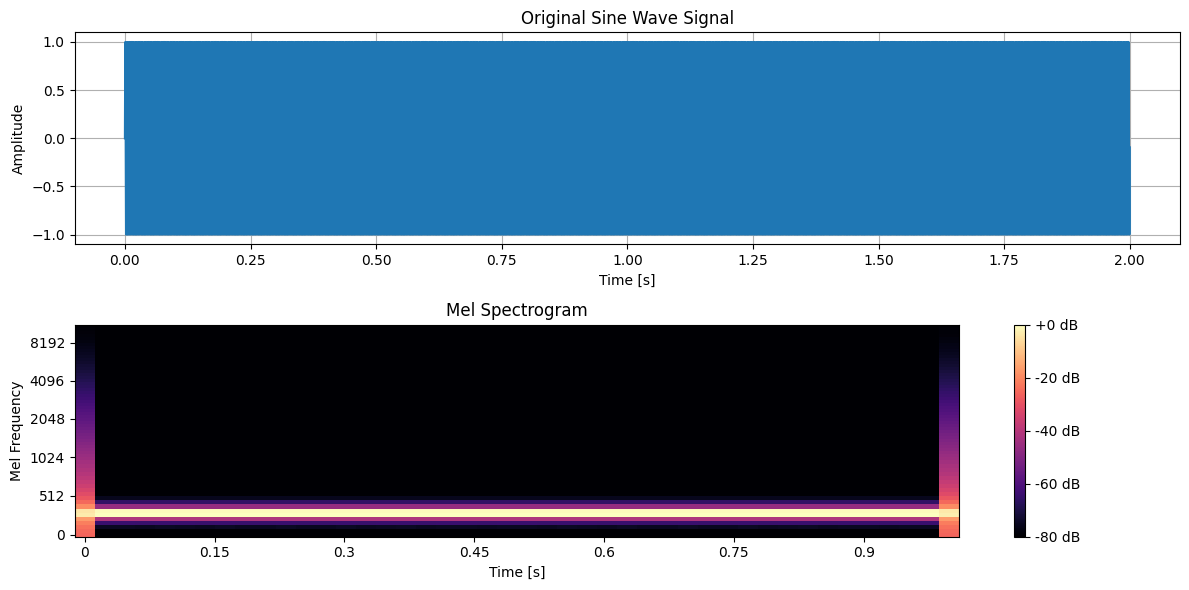

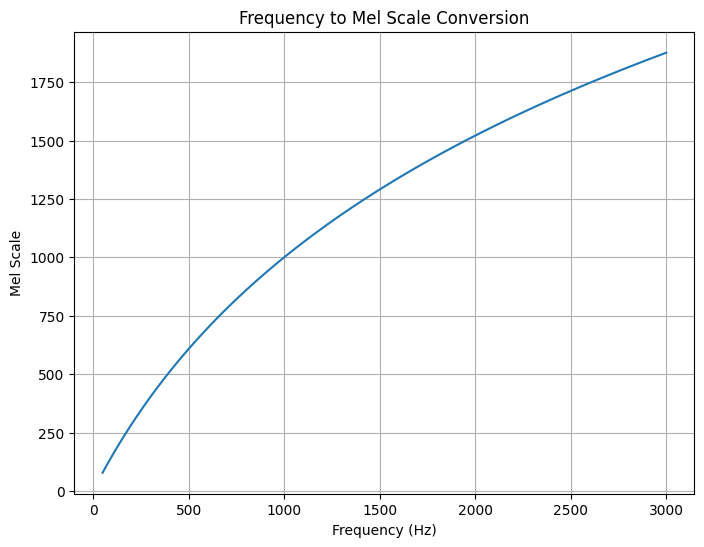

In [ ]:
# Install necessary libraries
!pip install numpy matplotlib scipy librosa

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Parameters
fs = 22050  # Sampling frequency (changed from 16000 to 22050)
duration = 2  # Duration in seconds (changed from 1 to 2)
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Create a simple sine wave (speech-like signal)
frequency = 330  # Frequency in Hz (changed from 440 to 330, E4 note)
signal = np.sin(2 * np.pi * frequency * t)  # A pure sine wave signal

# Plot the original signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Original Sine Wave Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# Step 1: Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(signal, n_fft=2048, hop_length=1024)  # n_fft and hop_length changed

# Step 2: Convert the magnitude spectrogram to Mel scale using librosa
mel_spectrogram = librosa.feature.melspectrogram(S=np.abs(D)**2, sr=fs, n_mels=64, fmax=11025)  # n_mels and fmax changed

# Plot Mel spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), x_axis='time', y_axis='mel', sr=fs)
plt.title("Mel Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.xlabel("Time [s]")
plt.ylabel("Mel Frequency")
plt.tight_layout()
plt.show()

# Mel scale example: frequency to Mel conversion
def hz_to_mel(frequency):
    return 2595 * np.log10(1 + frequency / 700)

# Generate frequencies from 50 Hz to 3000 Hz and convert to Mel scale (changed frequency range)
frequencies = np.linspace(50, 3000, 100)
mel_values = hz_to_mel(frequencies)

# Plot Mel scale
plt.figure(figsize=(8, 6))
plt.plot(frequencies, mel_values)
plt.title("Frequency to Mel Scale Conversion")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Mel Scale")
plt.grid(True)
plt.show()


# Refrance










* [towardsdatascience.com/music-genre-classification-with-python](https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8)

* [pytorch.org/vision](https://pytorch.org/vision/stable/models.html)

* [rwightman/pytorch-image-models/blob/master/timm/models/vision_transformer.py](https://github.com/rwightman/pytorch-image-models/blob/master/timm/models/vision_transformer.py)

* [github.com/kamalesh0406/Audio-Classification](https://github.com/kamalesh0406/Audio-Classification)

* [github.com/zcaceres/spec_augment](https://github.com/zcaceres/spec_augment)

* [musicinformationretrieval.com/ipython_audio](https://musicinformationretrieval.com/ipython_audio.html)


*   https://www.einfochips.com/blog/speech-processing-model-in-embedded-media-processing/

*   https://speechprocessingbook.aalto.fi/Introduction/Why_speech_processing.html


*   https://speechprocessingbook.aalto.fi/Representations/Short-time_analysis.html

*   https://colab.research.google.com/github/Speech-Interaction-Technology-Aalto-U/itsp/blob/main/Representations/Fundamental_frequency_F0.ipynb





